# Preliminary Interpretation of Prosecutorial Data from Middlesex County
## Introduction 
&nbsp;&nbsp;&nbsp;While discussing the rise of mass incarceration since the 1970s, researchers often point to factors such as the war on drugs, legislated sentencing practices, the growth of prisons, and increased policing (Baughman,4). These have all contributed to the rising number of people incarcerated, but overlook a key actor in the carceral state. In the last 10 years, crimes committed and arrests made have both decreased (Baughman,6). However, number of charges per arrest have been increasing each year since 2003 and, in particular, the number of felony filings by prosectuors (Baughman,6). Prosecutors have massive discretion in whether they pursue criminal charges, which charges to bring, if a plea bargains should take place, and what sentences to seek (Baughman,7). This routine overcharging by prosecutors contribute to police arrest data, creating an inaccurate narrative about public safety and contributing to "tough on crime" rhetoric. Most importantly, these felony filings have far reaching impacts for defendants, even those whose charges are later dropped. The Prison Policy Initiative, using data from the Bureau of Justice Statistics, state that 'the growth in the total jail population over the last 25 years is the direct result in increases in pretrial detention, not increases in the number of convicted people held in jails'. The median bail amount for a felony is $10,000 and while bail reform efforts are gaining traction across the country, they focus mainly on misdemeanors. Apart from pretrial detention, felony charges could show up on a criminal record, effecting housing, education, employment, healthcare, and more. <br>
&nbsp;&nbsp;&nbsp;Prosecutors remain difficult to track, and data is not readily available. Middlesex County’s District Attorney, Marian Ryan, recently placed prosecutor data available online.  Middlesex County is the largest county in both Massachusetts and all of New England. Wellesley sits on the outskirts of Norfolk County and very close to the county line of Middlesex. It is now possible to use data from our own community to answer pressing questions about prosecutors decisions and case outcomes. 
We are investigating if prosecutors routinely overcharge defendants by looking at outcomes in felony cases in Middlesex county. Are most felony cases ultimately dismissed?

## Method

### Import Packages
Import packages manage data and open files. This analysis uses three. `pandas` is a Python library used to read, analyze, and clean data, `matplotlib` visualizes data in Python, and `numpy` completes high level mathematical functions.

In [53]:
from locale import D_FMT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Set Up
Before anything else, it is necessary to customize some display options in order to increase visability and readability of dataframes. The code below increases the number of rows, disables column limits, increases the print width, and decreases the number of precision points after the decimal to 3 digits instead of the standard 6.

In [54]:
pd.set_option('display.max_rows', 20) # inc rows
pd.set_option('display.max_columns', None)  # disable column limits
pd.set_option('display.width', 1000)  # increase print width 
pd.set_option('display.precision', 3)  #decrease decimal digits

### About the Data
Middlesex County’s District Attorney, Marian Ryan, recently placed prosecutor data online. I took the last 5 years (2018 to 2022) to analyze. Firstly, it is necessary to read the data from an excel file and place it into a dataframe.

#### All charges

In [55]:
df = pd.read_excel("data/2018-22 test.xlsx", sheet_name=['2018-22 all','Felony codes'])
raw_df= df.get('2018-22 all')

/var/folders/z1/fp4qwsq92v35jdsh7vrfmwt00000gn/T/ipykernel_91136/686049477.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel("data/2018-22 test.xlsx", sheet_name=['2018-22 all','Felony codes'])


Here are the first five rows of the raw dataset. There are 59 columns, and 190102 rows in this raw dataset. 

In [56]:
raw_df.head(5)

,Case Number,Offense Date,Earliest Event Date,Court Location,Criminal Count Number,Filing Charge Code,Filing Charge Description,Disposition/Current Charge Code,Disposition/Current Charge Description,Charge/ Crime Type,Department Filing Charge,Way Charge Initiated,Defendant Race,Defendant Ethnicity,Defendant Gender,Name of Judge,Disposition Date,Imposed Dispositon Code,Imposed Disposition,Sentence Date,Sentence Type Imposed,Minimum Sentence Term Imposed,Minimum Suspended Term Imposed,Minimum Actual Term Imposed,Minimum Community Service Imposed,Maximum Sentence Term Imposed,Maximum Suspended Term Imposed,Maximum Actual Term Imposed,Maximum Community Service Imposed,Sentence Type Recmnd Code,Sentence Type Recommended,Minimum Sentence Term Recommended,Minimum Suspended Term Recommended,Minimum Actual Term Recommended,Minimum Community Service Recommended,Maximum Sentence Term Recommended,Maximum Suspended Term Recommended,Maximum Actual Term Recommended,Maximum Community Service Recommended,Jail Credit,Sentence Recommended,Sentence Imposed,Sentence Condition Recommended,Sentence Condition Imposed,Sentence Imposed Facility,Sentence Recommended Facility,Case Status,Sentence Start Date (Imp),Sentence Start Date (Rec),NPT/Stayed Until Date (Imp),NPT/Stayed Until Date (Rec),From And After Count (Imp),From And After Count (Rec),From And After State (Imp),From And After State (Rec),Restitution Amount (Imp),Restitution Amount (Rec),Fine Amount (Imposed),Fine Amount (Recommended)
0,19-11-659172,0215-06-02 00:00:00,2018-08-20,Woburn District Court,1,234A/42,JUROR FAIL TO ATTEND c234A §42,234A/42,JUROR FAIL TO ATTEND c234A §42,Failure to Appear,WOBURN,Arraigned,White,Not Provided,Male,"FRANK, DAVID",2018-08-20 00:00:00,DRC,DISMISSED OUTRIGHT AT REQUEST OF CW (POST-ARR),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18-12-632660,1944-02-03 00:00:00,2018-11-07,Ayer District Court,1,90/10/A,UNLICENSED OPERATION OF MV c90 §10,90/10/A,UNLICENSED OPERATION OF MV c90 §10,Motor Vehicle Other,ASHBY,Arraigned,White,Not Provided,Male,"GUZMAN, MARGARET",2018-11-07 00:00:00,DIF,DISMISSED BY FINES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18-12-632660,1944-02-03 00:00:00,2018-11-07,Ayer District Court,2,89/4A,MARKED LANES VIOLATION * c89 §4A,89/4A,MARKED LANES VIOLATION * c89 §4A,Motor Vehicle Other,ASHBY,Arraigned,White,Not Provided,Male,"GUZMAN, MARGARET",2018-11-07 00:00:00,NRS,NOT RESPONSIBLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19-04-641711,1946-10-19 00:00:00,2019-04-16,Lowell District Court,1,90/23/D,"LICENSE SUSPENDED, OP MV WITH c90 §23",90/23/D,"LICENSE SUSPENDED, OP MV WITH c90 §23",Motor Vehicle Other,BILLERICA,Arraigned,White,Non-Hispanic/Non-Latino,Male,"COFFEY, JOHN",2019-07-24 00:00:00,DRC,DISMISSED OUTRIGHT AT REQUEST OF CW (POST-ARR),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18-05-618121,1958-05-11 00:00:00,2018-05-16,Concord District Court,1,90/24/K,"OUILIQUOR, 2ND OFFENSE c90 §24(1)(a)(1)",90/24/K,"OUILIQUOR, 2ND OFFENSE c90 §24(1)(a)(1)",Motor Vehicle OUI,ACTON,Arraigned,White,Non-Hispanic/Non-Latino,Male,"FRANK, DAVID",2018-08-27 00:00:00,GP,GUILTY CHANGE OF PLEA,NaN,Sentence Suspended,NaN,NaN,NaN,NaN,6 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sentence Suspended (HOC) 6 months SS ???,NaN,24D PROGRAM; LOSS OF LICENSE,House of Corrections,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Case Status

While parsing through the dataset, it became clear that the `Case Status` column would need to be cleaned. As this data is for 2018-2022, the criminal court process could still be occuring for some cases and no outcome may have been found. This is particularly true for 2022 data, which only accounted for up to May of the year. It seemed reasonable to assume that open cases were more likely to have gone to a jury trial or a more lengthy court process, which more often than not end in a guilty conviction. In order to not undercount 'convicted' cases, I decided to focus only on closed cases. 80% of cases in the dataset were already closed. 

In [57]:
raw_df['Case Status'].value_counts() #value counts for case status

Closed                              153427
Open                                 28475
Default                               7915
Transferred                            283
ERROR-INVALID RPT DSPSTN ENTERED         2
Name: Case Status, dtype: int64

In [58]:
100.*raw_df['Case Status'].value_counts()/len(raw_df) #percentage of value counts

Closed                              80.708
Open                                14.979
Default                              4.164
Transferred                          0.149
ERROR-INVALID RPT DSPSTN ENTERED     0.001
Name: Case Status, dtype: float64

The new dataset below includes only closed cases. The number of charges included is now 153427.

In [59]:
closed_only= raw_df.loc[raw_df['Case Status'] == 'Closed']

#### Felony Codes

The raw dataset includes all charges within Middlesex County. It is necessary to narrow down our dataset by using only the felony charges specifically. Mass.gov has a downloadable list of all offense codes used in the state [here](https://www.mass.gov/service-details/masscourts-criminal-offense-codes). I downloaded this dataset and filtered out the felony codes in excel before reading the dataframe. Below are the first 5 rows. 

In [60]:
felony_codes=df.get('Felony codes')
felony_codes.head(5)

,Time,Charge,Type,Felony?,date,date.1,date.2,date.3,charge,description,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2022-12-23 17:12:00,10/30/A,"LOTTERY TICKET, ALTER/FORGE/COUNTERFEIT c10 '30",F,2000-01-01,2000-01-01,2005-12-11 11:12:00,2006-02-16 13:02:00,10/30/A-0,"<00>, with intent to defraud, did falsely make...",NaN,NaN,NaN,NaN
1,2022-12-23 17:12:00,10/30/B,"LOTTERY TICKET, UTTER OR PASS FALSE c10 §30",F,2000-01-01,2000-01-01,2005-12-11 11:12:00,2005-12-11 11:12:00,10/30/B-0,"<00>, with intent to defraud, did utter or pas...",NaN,NaN,NaN,NaN
2,2022-12-23 17:12:00,10/30A/B,"STATE LOTTERY LICENSE/JOB, PROMISE c10 §30A",F,2000-01-01,2000-01-01,2005-12-11 11:12:00,2005-12-11 11:12:00,10/30A/B-0,<00> did promise or engage to secure a license...,NaN,NaN,NaN,NaN
3,2022-12-23 17:12:00,105/55,WAREHOUSE RECEIPT FOR UNRECEIVED GOODS c105 §55,F,2000-01-01,2000-01-01,2005-12-11 11:12:00,2005-12-11 11:12:00,105/55-0,"<00>, being a warehouseman, or an officer, age...",NaN,NaN,NaN,NaN
4,2022-12-23 17:12:00,105/57,"WAREHOUSE RECEIPT, IMPROPER DUPLICATE c105 §57",F,2000-01-01,2000-01-01,2005-12-11 11:12:00,2005-12-11 11:12:00,105/57-0,"<00>, being a warehouseman, or an officer, age...",not being excepted by G.L. c.106,§7-601(1),in violation of G.L. c.105,"§57."""


There were 1478 total felonies listed. Only the `Charge` column is useful here and will match the `Filing Charge Code` column of the raw dataset. 

#### Isolating Felonies
I crossreferenced whether the `Filing Charge Code` was included in the felony dataset, then added a new column to the dataset `Felony?` with a corresponding True or False value. Next, I created a dataset with only rows whose `Felony?` column value was True. Finally, I dropped all rows that had a blank `Imposed Disposition Code`, ensuring each charge in the dataset had an outcome. 

In [69]:
file_felony=closed_only['Filing Charge Code'].isin(felony_codes['Charge'])
closed_only['Felony?']=file_felony
cleaned_df= closed_only.loc[closed_only['Felony?'] == True]
cleaned_df.dropna(subset = ['Imposed Dispositon Code'], inplace = True) 
cleaned_df.head(5)

/var/folders/z1/fp4qwsq92v35jdsh7vrfmwt00000gn/T/ipykernel_91136/4016280836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closed_only['Felony?']=file_felony
/var/folders/z1/fp4qwsq92v35jdsh7vrfmwt00000gn/T/ipykernel_91136/4016280836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset = ['Imposed Dispositon Code'], inplace = True)


,Case Number,Offense Date,Earliest Event Date,Court Location,Criminal Count Number,Filing Charge Code,Filing Charge Description,Disposition/Current Charge Code,Disposition/Current Charge Description,Charge/ Crime Type,Department Filing Charge,Way Charge Initiated,Defendant Race,Defendant Ethnicity,Defendant Gender,Name of Judge,Disposition Date,Imposed Dispositon Code,Imposed Disposition,Sentence Date,Sentence Type Imposed,Minimum Sentence Term Imposed,Minimum Suspended Term Imposed,Minimum Actual Term Imposed,Minimum Community Service Imposed,Maximum Sentence Term Imposed,Maximum Suspended Term Imposed,Maximum Actual Term Imposed,Maximum Community Service Imposed,Sentence Type Recmnd Code,Sentence Type Recommended,Minimum Sentence Term Recommended,Minimum Suspended Term Recommended,Minimum Actual Term Recommended,Minimum Community Service Recommended,Maximum Sentence Term Recommended,Maximum Suspended Term Recommended,Maximum Actual Term Recommended,Maximum Community Service Recommended,Jail Credit,Sentence Recommended,Sentence Imposed,Sentence Condition Recommended,Sentence Condition Imposed,Sentence Imposed Facility,Sentence Recommended Facility,Case Status,Sentence Start Date (Imp),Sentence Start Date (Rec),NPT/Stayed Until Date (Imp),NPT/Stayed Until Date (Rec),From And After Count (Imp),From And After Count (Rec),From And After State (Imp),From And After State (Rec),Restitution Amount (Imp),Restitution Amount (Rec),Fine Amount (Imposed),Fine Amount (Recommended),Felony?
9,18-01-608360,1971-09-01 00:00:00,2018-01-12,Somerville District Court,1,266/30/A,LARCENY OVER $250 c266 §30(1),266/30/A,LARCENY OVER $250 c266 §30(1),Larceny Other,MEDFORD,Arraigned,White,NaN,Male,"FLYNN, MAURICE",2018-01-12 00:00:00,CWF,CONTINUED W/O FINDING,NaN,Continued Without A Finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continued Without A Finding,NaN,STAY AWAY,Not Applicable,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
13,18-02-609802,1981-09-02 00:00:00,2018-03-20,Framingham District Court,1,266/30/A,LARCENY OVER $250 c266 §30(1),266/30/A,LARCENY OVER $250 c266 §30(1),Larceny Other,FRAMINGHAM,Arraigned,White,Non-Hispanic/Non-Latino,Male,NaN,1918-06-19 00:00:00,DWO,DISMISSED W/O PREJUDICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
15,18-02-609802,1981-09-02 00:00:00,2018-03-20,Framingham District Court,3,265/13A/B,A&B c265 §13A,265/13A/B,A&B c265 §13A,Larceny Other,FRAMINGHAM,Arraigned,White,Non-Hispanic/Non-Latino,Male,NaN,2018-06-19 00:00:00,DWO,DISMISSED W/O PREJUDICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
16,18-10-629736,1981-10-14 00:00:00,2018-10-15,Framingham District Court,1,266/15/A,"BURGLARY, UNARMED c266 §15",266/16/A,B&E NIGHTTIME FOR FELONY c266 §16,Burglary/Unarmed,FRAMINGHAM,Arraigned,Black or African American,Not Provided,Male,"CUNIS, DAVID",2019-06-17 00:00:00,DWL,DISMISSED W/O PREJUDICE LACK OF PROSECUTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
17,18-10-629736,1981-10-14 00:00:00,2018-10-15,Framingham District Court,2,94C/32A/A,"COCAINE, DISTRIBUTE c94C §32A(c)",94C/32A/E,"DRUG, DISTRIBUTE CLASS B c94C §32A(a)",Burglary/Unarmed,FRAMINGHAM,Arraigned,Black or African American,Not Provided,Male,"CUNIS, DAVID",2019-06-17 00:00:00,DWL,DISMISSED W/O PREJUDICE LACK OF PROSECUTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


Now, our dataset includes only felonies that have a closed case status and a disposition code. Our sample size is now 36,458 

#### Dispositions

Next, we look at case outcomes. In order to do this, it was necessary to categorize all dispositions into categories for later analysis. I did this in excel. 

In [100]:
disposition_df = pd.read_excel("data/Dispositions.xlsx", sheet_name=['Sheet1'])
dispositions=disposition_df.get('Sheet1')

I separated each of these `Imposed Disposition Codes` into 6 categories: <br>
&nbsp;&nbsp;CONVICTED - Found guilty <br>
&nbsp;&nbsp;ACQUITTED OR DISMISSED- dismissed by prosecution or found not guilty<br>
&nbsp;&nbsp;TRANSFER- transferred to another county or to federal jurisdiction <br>
&nbsp;&nbsp;PLEA DEAL-Pled guilty pretrial, sometimes for lesser offense<br>
&nbsp;&nbsp;ALTERNATIVE TO INCARCERATION - Examples include pretrial probation or a continuance without a finding which will result in eventual dismissal of case<br>
&nbsp;&nbsp;POSTPONED- hearing postponed due to variety of reasons  <br>

In [101]:
dispositions

,Imposed Dispositon Code,Disposition Category
0,GJT,Convicted
1,GCT,Convicted
2,GLF,Convicted
3,GTL,Convicted
4,DELB,Convicted
...,...,...
53,CWFL,Alternative
54,CWFJ,Alternative
55,PTPL,Alternative
56,GENC,postponed


I merged these two datasets on the `Imposed Disposition Code` value - creating a new column `Disposition Category`. Now each charge can be categorized by the metric I created. Here is the first 5 rows of the final dataset.  

In [107]:
felonies_outcomes= cleaned_df.merge(dispositions, on = 'Imposed Dispositon Code')
felonies_outcomes.head(5)


,Case Number,Offense Date,Earliest Event Date,Court Location,Criminal Count Number,Filing Charge Code,Filing Charge Description,Disposition/Current Charge Code,Disposition/Current Charge Description,Charge/ Crime Type,Department Filing Charge,Way Charge Initiated,Defendant Race,Defendant Ethnicity,Defendant Gender,Name of Judge,Disposition Date,Imposed Dispositon Code,Imposed Disposition,Sentence Date,Sentence Type Imposed,Minimum Sentence Term Imposed,Minimum Suspended Term Imposed,Minimum Actual Term Imposed,Minimum Community Service Imposed,Maximum Sentence Term Imposed,Maximum Suspended Term Imposed,Maximum Actual Term Imposed,Maximum Community Service Imposed,Sentence Type Recmnd Code,Sentence Type Recommended,Minimum Sentence Term Recommended,Minimum Suspended Term Recommended,Minimum Actual Term Recommended,Minimum Community Service Recommended,Maximum Sentence Term Recommended,Maximum Suspended Term Recommended,Maximum Actual Term Recommended,Maximum Community Service Recommended,Jail Credit,Sentence Recommended,Sentence Imposed,Sentence Condition Recommended,Sentence Condition Imposed,Sentence Imposed Facility,Sentence Recommended Facility,Case Status,Sentence Start Date (Imp),Sentence Start Date (Rec),NPT/Stayed Until Date (Imp),NPT/Stayed Until Date (Rec),From And After Count (Imp),From And After Count (Rec),From And After State (Imp),From And After State (Rec),Restitution Amount (Imp),Restitution Amount (Rec),Fine Amount (Imposed),Fine Amount (Recommended),Felony?,Disposition Category
0,18-01-608360,1971-09-01 00:00:00,2018-01-12,Somerville District Court,1,266/30/A,LARCENY OVER $250 c266 §30(1),266/30/A,LARCENY OVER $250 c266 §30(1),Larceny Other,MEDFORD,Arraigned,White,NaN,Male,"FLYNN, MAURICE",2018-01-12 00:00:00,CWF,CONTINUED W/O FINDING,NaN,Continued Without A Finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continued Without A Finding,NaN,STAY AWAY,Not Applicable,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Alternative
1,18-02-609698,2012-01-01 00:00:00,2018-02-27,Cambridge District Court,2,266/30/A,LARCENY OVER $250 c266 §30(1),266/30/A,LARCENY OVER $250 c266 §30(1),Fraud,CAMBRIDGE,Arraigned,Black or African American,Non-Hispanic/Non-Latino,Female,"HARNAIS, ROBERT",2021-06-15 00:00:00,CWF,CONTINUED W/O FINDING,2021-06-15 00:00:00,Probation,NaN,NaN,NaN,NaN,2 years,NaN,NaN,NaN,P,Probation,NaN,NaN,NaN,NaN,2 years,NaN,NaN,NaN,NaN,Probation 2 years,Probation 2 years,JUDGES INSTRUCTIONS,JUDGES INSTRUCTIONS,Not Applicable,Not Applicable,Closed,Same as Sentence Date,Same as Sentence Date,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Alternative
2,18-02-609698,2013-01-01 00:00:00,2018-02-27,Cambridge District Court,5,266/30/A,LARCENY OVER $250 c266 §30(1),266/30/A,LARCENY OVER $250 c266 §30(1),Fraud,CAMBRIDGE,Arraigned,Black or African American,Non-Hispanic/Non-Latino,Female,"HARNAIS, ROBERT",2021-06-15 00:00:00,CWF,CONTINUED W/O FINDING,2021-06-15 00:00:00,Probation,NaN,NaN,NaN,NaN,2 years,NaN,NaN,NaN,P,Probation,NaN,NaN,NaN,NaN,2 years,NaN,NaN,NaN,NaN,Probation 2 years,Probation 2 years,JUDGES INSTRUCTIONS,JUDGES INSTRUCTIONS,Not Applicable,Not Applicable,Closed,Same as Sentence Date,Same as Sentence Date,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Alternative
3,18-11-630845,2013-03-13 00:00:00,2018-11-07,Lowell District Court,1,266/30/A,LARCENY OVER $250 c266 §30(1),266/30/A,LARCENY OVER $250 c266 §30(1),Larceny Other,BILLERICA,Arraigned,White,Not Provided,Female,"PEARSON, BARBARA",2019-01-18 00:00:00,CWF,CONTINUED W/O FINDING,NaN,Continued Without A Finding,NaN,NaN,NaN,NaN,6 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Continued Without A Finding,NaN,NaN,Not Applicable,NaN,Closed,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Alternative
4,18-02-609698,2014-01-01 00:00:00,2018-02-27,Cambridge District Court,8,266/30/A,LARCENY OVER $250 c266 §30(1),266/30/A,LARCENY OVER $250 c266 §30(1),Fraud,CAMBRIDGE,Arraigned,Black or African 

## Results and Analysis

I calculated the percentage of each disposition category and found that 65% of charges were acquitted or eventually dismissed. 17.8% were resolved through a plea deal, and 15.7% were placed into alternatives to incarceration. Only 1.3% were convicted outright of the filing felony charge. 

In [106]:
outcomes=felonies_outcomes['Disposition Category'].value_counts()
100*outcomes/len(felonies_outcomes)

Acquitted or dismissed    65.004
Plea Deal                 17.826
Alternative               15.678
Convicted                  1.281
postponed                  0.195
Transfer                   0.016
Name: Disposition Category, dtype: float64

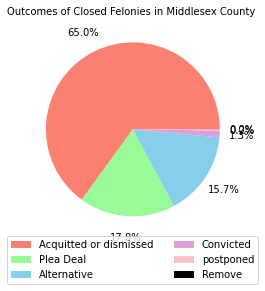

In [67]:
plt.figure()    # create a figure
plt.title(label='Outcomes of Closed Felonies in Middlesex County ', fontsize= 10)   
label = outcomes.keys()    
colors = ['salmon','palegreen','skyblue', 'plum','pink','black', 'white'] 
chart = plt.pie(outcomes, autopct='%1.1f%%', \
    textprops={"fontsize":10}, pctdistance=1.25, colors=colors)
plt.legend(label, loc="center", bbox_to_anchor=(0.5, -0.1), ncol=2);

This finding is backed up by looking at the sentencing of the charges. I calculated that 66% of the cases had a null value for the `Sentence Imposed` column. This is consistent with our findings above. Out of those sentenced, the top three most common outcomes were varying lengths of probation (1 yr, 6 mon, and 2 yrs respectively). These sentences could be the result of a pretrial probation or a continuance without a finding disposition, meaning the charge will be dismissed after the conclusion of the probationary period. 

In [119]:
100*felonies_outcomes['Sentence Imposed'].isnull().sum()/len(felonies_outcomes)

66.28729706011408

In [115]:
felonies_outcomes['Sentence Imposed'].value_counts().loc[lambda x : x>100] 

Probation 1 year                2419
Probation 6 months              1234
Probation 2 years                900
Continued Without  A Finding     886
Probation 18 months              807
Probation 3 years                518
Probation 9 months               341
Committed (HOC) 1 year           328
Committed (HOC) 6 months         270
Probation 3 months               225
Filed                            217
Committed (HOC) 18 months        202
Committed (HOC) 2 years          201
Committed (HOC) 2.5 years        153
Probation ???                    152
Probation 12 months              126
Name: Sentence Imposed, dtype: int64

To see how many felony charges ended in incarceration, I counted the number of `Sentence Imposed` rows that included the word 'Committed' (consistent with the dataframe's layout). This provided a true and false value for each row that did not have a blank value for sentencing. I then added the number of blank rows to the False column, and calculated a percentage. In total, 93.4% of all felony cases in Middlesex county did not result in incarcerated, only 6.6% did.  

In [142]:
felonies_outcomes['Sentence Imposed'].str.contains('Committed').value_counts()

False    9883
True     2410
Name: Sentence Imposed, dtype: int64

In [146]:
incarcerated=felonies_outcomes['Sentence Imposed'].str.contains('Committed').value_counts()
incarcerated[0]=incarcerated[0]+felonies_outcomes['Sentence Imposed'].isnull().sum()
100*incarcerated/len(felonies_outcomes)

False    93.391
True      6.609
Name: Sentence Imposed, dtype: float64

## Conclusion
&nbsp;&nbsp;&nbsp; The Middlesex District Attorney Office's prosectution data prove that most defendants facing felony charges in Middlesex County are acquitted or their charges dismissed. The findings detailed above corroborate that prosecutors routinely overcharge people with felonies, while the grand majority will not be convicted. Of those convicted, or pushed into a plea deal, only 6.6% are incarcerated.  <BR> 

&nbsp;&nbsp;&nbsp; I would love to continue to dive into this data. Firstly, I would like to revist my grouping of dispositions. I did my best with the resources and time I had, but I would want to make sure that I am painting an accurate picture of charge outcome. Additionally, is the data able to show some insight into plea deal decision making? Baughman states that prosecutors overcharge in order to gain leverage and force defendants into a guilty plea. Is this illustrated within this dataset? This analysis does not take into account multiple charges against one defendant, though it occurs frequently in the dataset. I would also like to explore whether there is a racial disparity in charge outcome and prosecutorial decisionmaking. The [Vera Institute of Justice](https://www.vera.org/downloads/publications/Using-data-to-advance-fairness-in-criminal-prosecution.pdf) has looked into this very question in several counties across the country. This could provide a starting point to my analysis. I thoroughly enjoyed this independent study, even with a rough semester for my health!

## Sources 
&nbsp;&nbsp;Baughman, Shima Baradaran and Wright, Megan, Prosecutors and Mass Incarceration (September 8, 2020). Southern California Law Review, Forthcoming, University of Utah College of Law Research Paper No. 392, Penn State Law Research Paper No. 20-2021, https://ssrn.com/abstract=3689242 <br><br>
&nbsp;&nbsp;Boston Municipal Court. “MassCourts Criminal Offense Codes.” Mass.gov, https://www.mass.gov/service-details/masscourts-criminal-offense-codes.  <br><br>
&nbsp;&nbsp;Sawyer, Wendy, and Peter Wagner. Mass Incarceration: The Whole Pie 2022. Prison Policy Initiative, 14 Mar. 2022, https://www.prisonpolicy.org/reports/pie2022.html. <br><br>
&nbsp;&nbsp;“Prosecution Data and Statistics.” Middlesex County District Attorney's Office, https://www.middlesexda.com/public-information/pages/prosecution-data-and-statistics. 